**Description**: Analyze accuracies for $n = 50$.

In [1]:
from typing import Literal

import seaborn as sns

import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_test: Literal[100, 200, 500] = 100

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = "accuracies_from_paper"
accuracy_df = utils.load_all_accuracies(accuracies_home_dir, num_test)  # for plot
num_correct_df = utils.load_all_num_correct(accuracies_home_dir, num_test)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + lm_type + (1|dataset/pair)"
id_vars = ["num_test", "pair", "lm_type", "dataset"]

# Plot

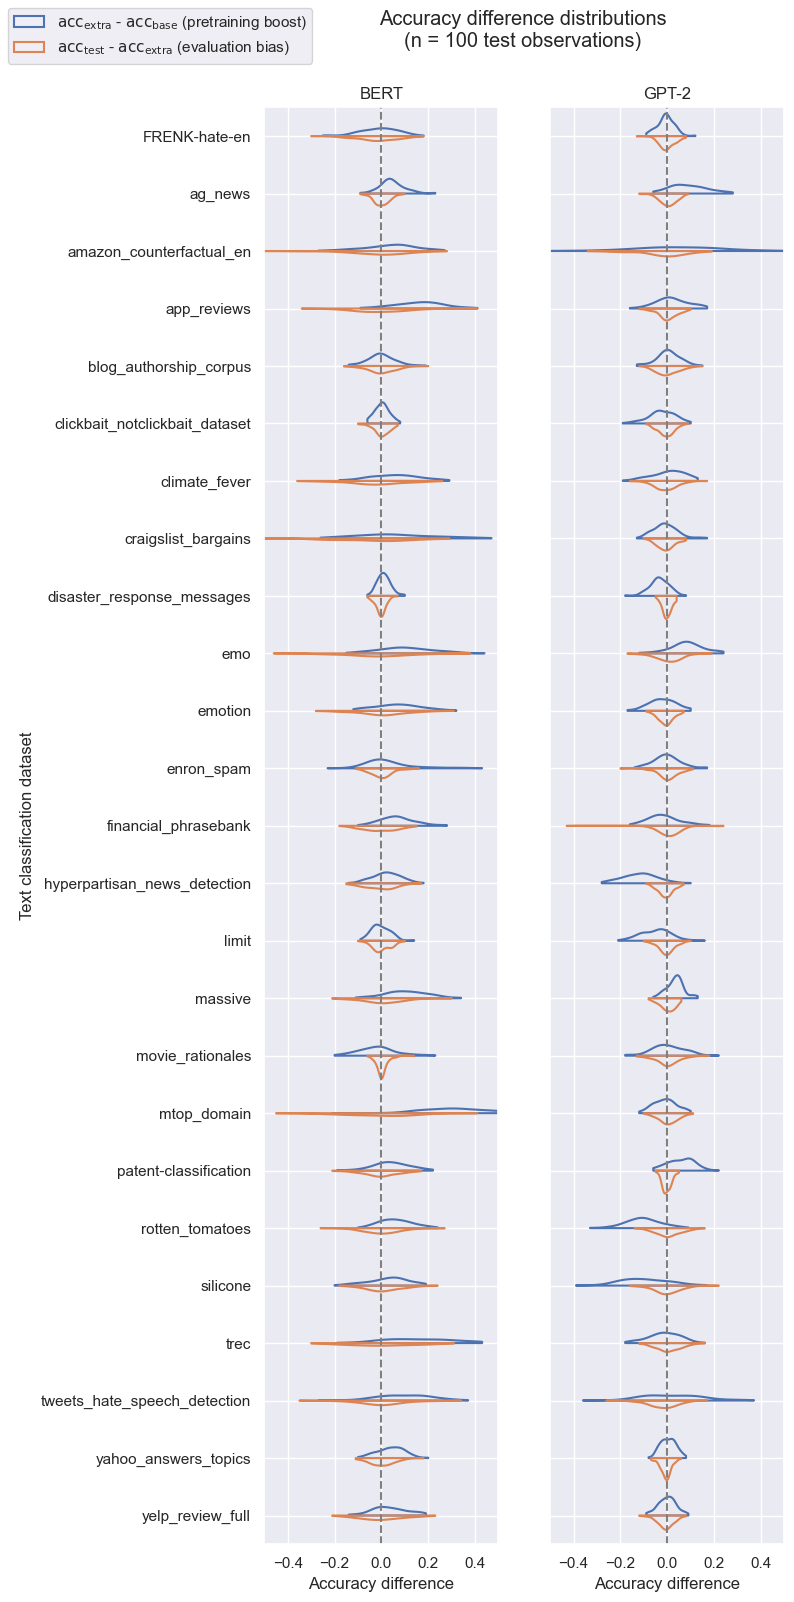

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test)

# Control

In [7]:
summary_control, summary_relative_control = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌─────────┬──────────┐
│ mean    ┆ se       │
╞═════════╪══════════╡
│ 0.02818 ┆ 0.009338 │
└─────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.206409 ┆ 0.059446 │
└──────────┴──────────┘


In [8]:
summary_control

dataset,mean,se
"""FRENK-hate-en""",-0.0084,0.004545
"""ag_news""",0.06765,0.00506
"""amazon_counter…",0.04205,0.011243
"""app_reviews""",0.0914,0.007939
"""blog_authorshi…",0.00185,0.003925
…,…,…
"""silicone""",-0.0333,0.008082
"""trec""",0.07275,0.009987
"""tweets_hate_sp…",0.0595,0.009048
"""yahoo_answers_…",0.02205,0.003521


In [9]:
summary_relative_control

dataset,mean,se
"""FRENK-hate-en""",-0.010157,0.008082
"""ag_news""",0.135071,0.011937
"""amazon_counter…",0.107139,0.029498
"""app_reviews""",0.746584,0.069206
"""blog_authorshi…",0.009741,0.00777
…,…,…
"""silicone""",-0.053935,0.015813
"""trec""",0.331845,0.044494
"""tweets_hate_sp…",0.116221,0.016295
"""yahoo_answers_…",0.29912,0.042764


In [10]:
# model_control, summary_control, az_summary_control = utils.stat_model(
#     num_correct_df,
#     treatment="extra",
#     control="base",
#     equation=equation,
#     id_vars=id_vars,
#     draws=250,
#     tune=250,
#     chains=2,
# )

In [11]:
# print(model_control)

# Treatment

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌───────────┬──────────┐
│ mean      ┆ se       │
╞═══════════╪══════════╡
│ -0.002468 ┆ 0.001353 │
└───────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.024887 ┆ 0.008304 │
└──────────┴──────────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",-0.00715,0.0047
"""ag_news""",0.00285,0.002461
"""amazon_counter…",-0.0144,0.008194
"""app_reviews""",-0.0016,0.006596
"""blog_authorshi…",0.0024,0.0039
…,…,…
"""silicone""",0.00505,0.004784
"""trec""",0.006,0.007503
"""tweets_hate_sp…",-0.0079,0.006511
"""yahoo_answers_…",-0.00205,0.002871


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",-0.005624,0.008324
"""ag_news""",0.006575,0.003767
"""amazon_counter…",-0.010828,0.011695
"""app_reviews""",0.061801,0.028916
"""blog_authorshi…",0.010179,0.007665
…,…,…
"""silicone""",0.01894,0.010355
"""trec""",0.05873,0.021035
"""tweets_hate_sp…",-0.003654,0.010754
"""yahoo_answers_…",0.03534,0.025183


In [15]:
# model_bias, summary_bias, az_summary_bias = utils.stat_model(
#     num_correct_df,
#     treatment="test",
#     control="extra",
#     equation=equation,
#     id_vars=id_vars,
#     draws=250,
#     tune=250,
#     chains=2,
# )

In [16]:
# print(model_bias)

In [17]:
# summary_control.to_netcdf(filename=f"main_{num_test}_control.nc")

In [18]:
# summary_bias.to_netcdf(filename=f"main_{num_test}_treatment.nc")